In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
# import seaborn as sns
# from collections import OrderedDict
# from collections import Counter

# Display pandas df without truncation
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='d')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1,600)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [5]:
results_folders = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptiveTimeout/'

In [6]:
if not os.path.isdir(results_folders):
    print(colored("Error, " + results_folders + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folders + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptiveTimeout/ exists


In [7]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

In [8]:
def set_box_color(bp, edge_color, fill_color):
    plt.setp(bp['boxes'], color=edge_color)
    plt.setp(bp['whiskers'], color=edge_color)
    plt.setp(bp['caps'], color=edge_color)
    plt.setp(bp['medians'], color=edge_color)
    plt.setp(bp['fliers'], color=green_diamond)
#     for flier in bp['fliers']:
#         flier.set(marker='o', color=edge_color, alpha=1)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [9]:
def boxplot_3dict_2axis(dictl1, dictc1, dictr1, dictl2, dictc2, dictr2):
    ticks = dictr1.keys()

    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
    
    
    bpc1 = ax1.boxplot(dictc1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictc1.values())))*3.0, widths=0.4)
    bpl1 = ax1.boxplot(dictl1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl1.values())))*3.0-0.6, widths=0.4)
    bpr1 = ax1.boxplot(dictr1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictr1.values())))*3.0+0.6, widths=0.4)

    set_box_color(bpl1, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr1, 'blue', 'cyan')
    set_box_color(bpc1, 'green', '#BCEE68')

    ax1.set_ylabel("Completed areas blue")
    ax1.grid(True,linestyle='-',color='0.85')
    
    ax1.set_ylim(0, 180)
    ax1.set_xticks(range(0, len(ticks) * 3, 3))
    ax1.set_xticklabels(["Regions", "Mixed"])
    ax1.set_xlim(xmin=-2, xmax=len(ticks)*3)
   
    # draw temporary red and blue lines and use them to create a legend
    ax1.plot([], c='red', label='Brownian')
    ax1.plot([], c='green', label='Persistent')
    ax1.plot([], c='blue', label='Adaptive')
    ax1.legend(loc=2)
    
    bpc2 = ax2.boxplot(dictc2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictc2.values())))*3.0, widths=0.4)
    bpl2 = ax2.boxplot(dictl2.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl2.values())))*3.0-0.6, widths=0.4)
    bpr2 = ax2.boxplot(dictr2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictr2.values())))*3.0+0.6, widths=0.4)

    set_box_color(bpl2, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr2, 'blue', 'cyan')
    set_box_color(bpc2, 'green', '#BCEE68')

    ax2.set_ylabel("Completed areas red")
    ax2.grid(True,linestyle='-',color='0.85')
    
    ax2.set_ylim(0, 80)
    ax2.set_xticks(range(0, len(ticks) * 3, 3))
    ax2.set_xticklabels(["Regions", "Mixed"])
    ax2.set_xlim(xmin=-2, xmax=len(ticks)*3)
    

    
    # draw temporary red and blue lines and use them to create a legend
    ax2.plot([], c='red', label='Brownian')
    ax2.plot([], c='green', label='Persistent')
    ax2.plot([], c='blue', label='Adaptive')
    ax2.legend(loc=2)
    
#     plt.tight_layout()
    figName = "adaptiveTimeout_completedTaskMeanSplit"+'.png'
    print("Figure name: ", figName)

    plt.savefig(figName)

## Completed mixed areas in details (split blue and red)

In [10]:
completed_task_blue_dict = {}
completed_task_red_dict = {}

for results_folder in os.listdir(results_folders):
    timeout = -1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folders,results_folder))):
        print(colored("Timeout folder:", 'blue'),timeout_folder)

        parameters = timeout_folder.split("_")

        for param in parameters:
            if param.startswith("timeout"):
    #             print(param.split("#")[-1])
                timeout = int(param.split("#")[-1]) * 10
    #             print("\ttimeout:",timeout)

    #     if timeout == 20 :
    #         break

        if timeout == -1 :
            print(colored("\tWARNING: wrong timeout folder", 'green'))
            continue

        exp_config = parameters[0]+"_"+parameters[1]
        print("\tExp configuration:",exp_config)

        completed_task_count_red = []
        completed_task_count_blue = []
        for filename in os.listdir(os.path.join(results_folders, results_folder, timeout_folder)):
            if filename.endswith("completed_taskLOG.tsv"):
                if not os.path.getsize(os.path.join(results_folders, results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    completed_task_blue_dict[str(timeout)] = 0
                    completed_task_red_dict[str(timeout)] = 0
                    continue
    #             print('\tfilename: ', filename)

                df_completedTask = pd.read_csv(os.path.join(results_folders, results_folder, timeout_folder, filename), sep="\t", header=None)
                df_completedTask.columns = completed_task_label

                completed_task_count_blue += [df_completedTask.loc[df_completedTask['type'] == 0].shape[0]]
                completed_task_count_red += [df_completedTask.loc[df_completedTask['type'] == 1].shape[0]]

        if(len(completed_task_count_blue)+len(completed_task_count_red)!= 100):
            print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
        print(colored("\tlen(completed_task_count)"+str(len(completed_task_count_blue)+len(completed_task_count_red)), 'blue'))
        completed_task_blue_dict[exp_config] = completed_task_count_blue
        completed_task_red_dict[exp_config] = completed_task_count_red
    
            


Timeout folder: Regions_Adaptive_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Adaptive
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_Brownian_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Brownian
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_Persistent_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Persistent
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_Adaptive_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Mixed_Adaptive
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_Brownian_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#sec

In [11]:
for key in completed_task_red_dict.keys():
    print(key)

Regions_Adaptive
Regions_Brownian
Regions_Persistent
Mixed_Adaptive
Mixed_Brownian
Mixed_Persistent


In [12]:
# boxplot_3dict({"Regions_Brownian":completed_task_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_dict.pop("Mixed_Brownian")},
#               {"Regions_Persistent":completed_task_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_dict.pop("Mixed_Persistent")},
#               {"Regions_Adaptive":completed_task_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_dict.pop("Mixed_Adaptive")},
#               "adaptiveTimeout_completedTaskMean")

Figure name:  adaptiveTimeout_completedTaskMeanSplit.png


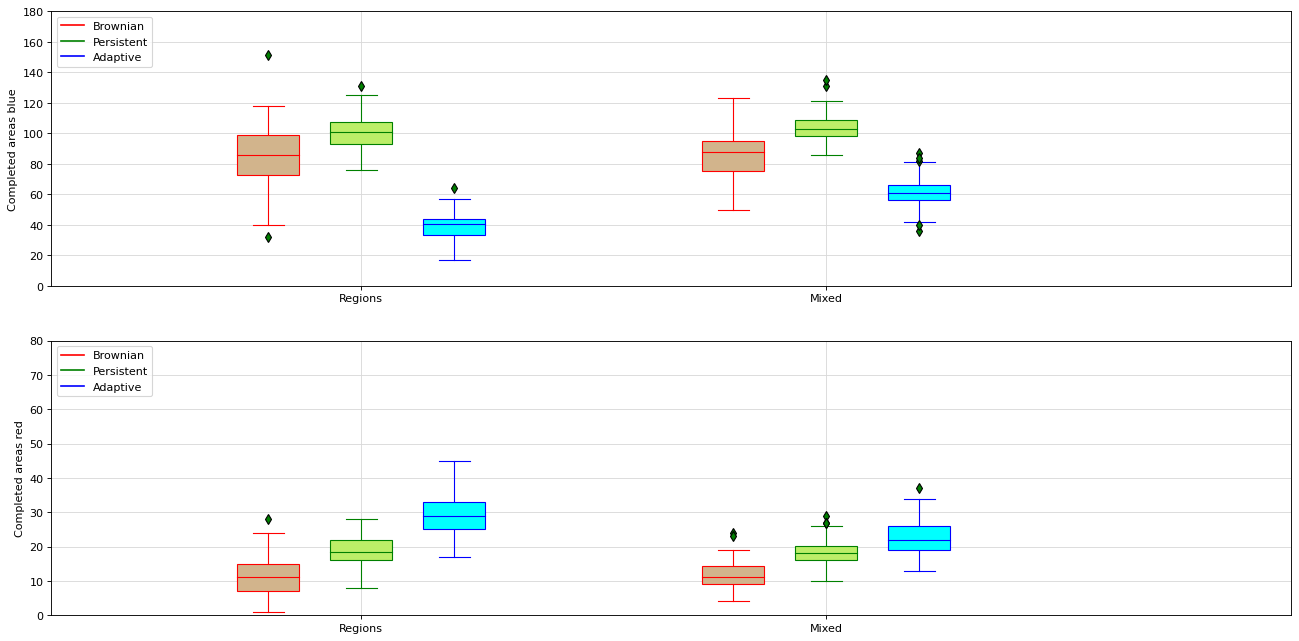

In [13]:
boxplot_3dict_2axis({"Regions_Brownian":completed_task_blue_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_blue_dict.pop("Mixed_Brownian")},
                    {"Regions_Persistent":completed_task_blue_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_blue_dict.pop("Mixed_Persistent")},
                    {"Regions_Adaptive":completed_task_blue_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_blue_dict.pop("Mixed_Adaptive")},
                    {"Regions_Brownian":completed_task_red_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_red_dict.pop("Mixed_Brownian")},
                    {"Regions_Persistent":completed_task_red_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_red_dict.pop("Mixed_Persistent")},
                    {"Regions_Adaptive":completed_task_red_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_red_dict.pop("Mixed_Adaptive")})